# Extracting Data from a CSV file and developing a calibration curve

   CO_Area_(mV*min)  CO_Concentration(%)  CO (ml/min)  He (ml/min)
0           0.00000                  0.0          0.0         50.0
1           0.29425                  0.4          2.0         48.0
2           0.36585                  0.5          2.5         47.5
3           0.58455                  0.8          4.0         46.0
4           0.75885                  1.0          5.0         45.0
5           1.48010                  2.0         10.0         40.0
6           2.22525                  3.0         15.0         35.0
7           2.94810                  4.0         20.0         30.0
 RMSE value is: 0.0


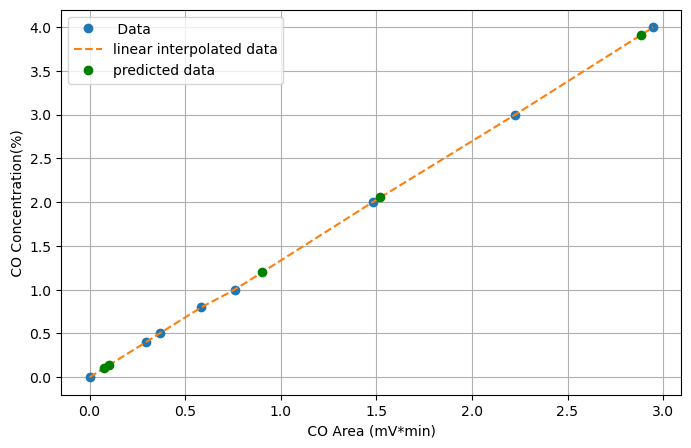

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

calibration_data= pd.read_csv("Calibration data.csv")
df= pd. DataFrame(calibration_data)
print(df)
x= df.iloc[:,0].astype(float)
y=df.iloc[:,1].astype(float)
# print(x)
# print(y)

# original Data
x1= np.array(x)
y1=np.array(y)

x1_test= np.array([0.9014,1.5207,2.8844, 0.1012,0.0774])
y1_test = np.interp(x1_test, x1, y1)

# create interpolation function
f_linear= interp1d(x1,y1, kind='linear')
y1_predicted= f_linear(x1_test)

# Compute RMSE for each method
rmse_linear = np.sqrt(mean_squared_error(y1_test, y1_predicted))
print(" RMSE value is:", rmse_linear)

x_dense = np.linspace(0,2.948,50)
y_dense_linear = f_linear(x_dense)

plt.figure(figsize=(8,5))
plt.plot(x,y, 'o',label=" Data" )
plt.plot(x_dense,y_dense_linear,'--',label="linear interpolated data" )
plt.plot(x1_test,y1_predicted,'go',label="predicted data" )
plt.xlabel(" CO Area (mV*min) ")
plt.ylabel(" CO Concentration(%) ")
plt.grid()
plt.legend()
plt.show()

# Numerical Integration to calculate the amount of catalyst

C:\Users\shams\AppData\Local\Temp\ipykernel_15844\896985518.py:9: DeprecationWarning: You are passing x=[0.  0.1 0.2 0.4 0.6 0.7 0.8] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  Catalyst_PBR = simpson(y, x)


Total amount of catalyst in PBR = 2.149 Kg


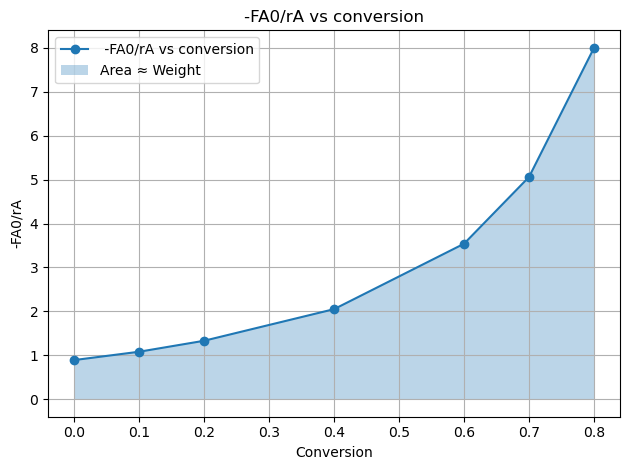

In [1]:
import numpy as np
from scipy.integrate import simpson
import matplotlib.pyplot as plt

# conversion and rate of the reaction
x = np.array([0.0,0.1,0.2,0.4,0.6,0.7,0.8])  # conversion
y = np.array([0.89,1.08, 1.33, 2.05, 3.54, 5.06,8.0])  # -FA0/rA

Catalyst_PBR = simpson(y, x)

print(f"Total amount of catalyst in PBR = {Catalyst_PBR:.3f} Kg")

plt.plot(x, y, 'o-', label=' -FA0/rA vs conversion')
plt.fill_between(x, y, alpha=0.3, label='Area ≈ Weight')
plt.xlabel('Conversion')
plt.ylabel('-FA0/rA')
plt.title('-FA0/rA vs conversion')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Characterization_Finding Raman peak position 

Maximum Intensity: 25491
At Raman Shift: 1365.155 cm⁻¹


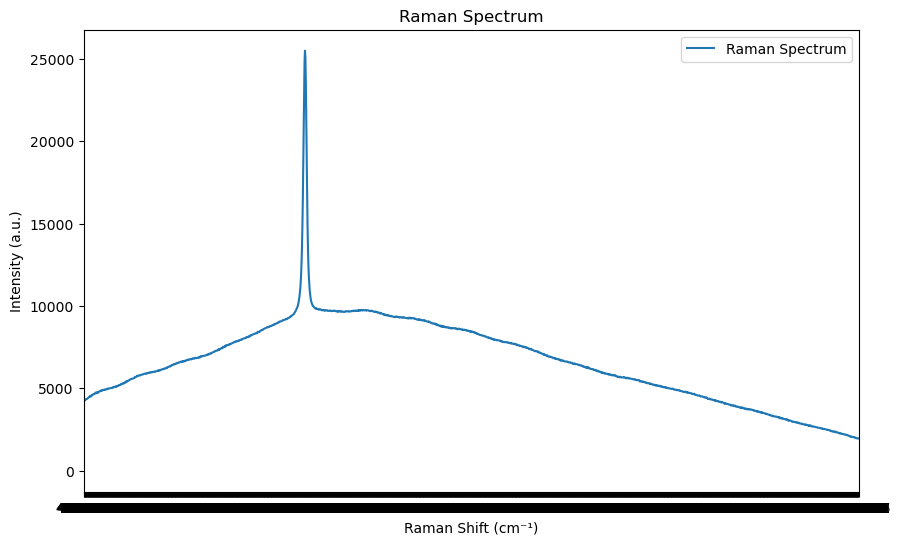

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
Raman_data= pd.read_csv("h-BN_Raman.csv")
df2= pd. DataFrame(Raman_data)
#print(df)

raman_shift= df2.iloc[:,0]
intensity= df2.iloc[:,1]

max_intensity = intensity.max()
max_index = intensity.idxmax()
max_shift =raman_shift[max_index]

print(f"Maximum Intensity: {max_intensity}")
print(f"At Raman Shift: {max_shift} cm⁻¹")

plt.figure(figsize=(10, 6))
plt.plot(raman_shift, intensity, label='Raman Spectrum')
plt.xlim(200,2000)
plt.xlabel('Raman Shift (cm⁻¹)')
plt.ylabel('Intensity (a.u.)')
plt.title('Raman Spectrum')
plt.legend()
plt.show()

# Curve fitting by Linear Regression Mehod to find the order of a reaction

The coefficient of determinant R^2 for zero order plot :0.8596
The coefficient of determinant R^2 for 1st order plot :0.8338
The coefficient of determinant R^2 for 2nd order plot :0.4451


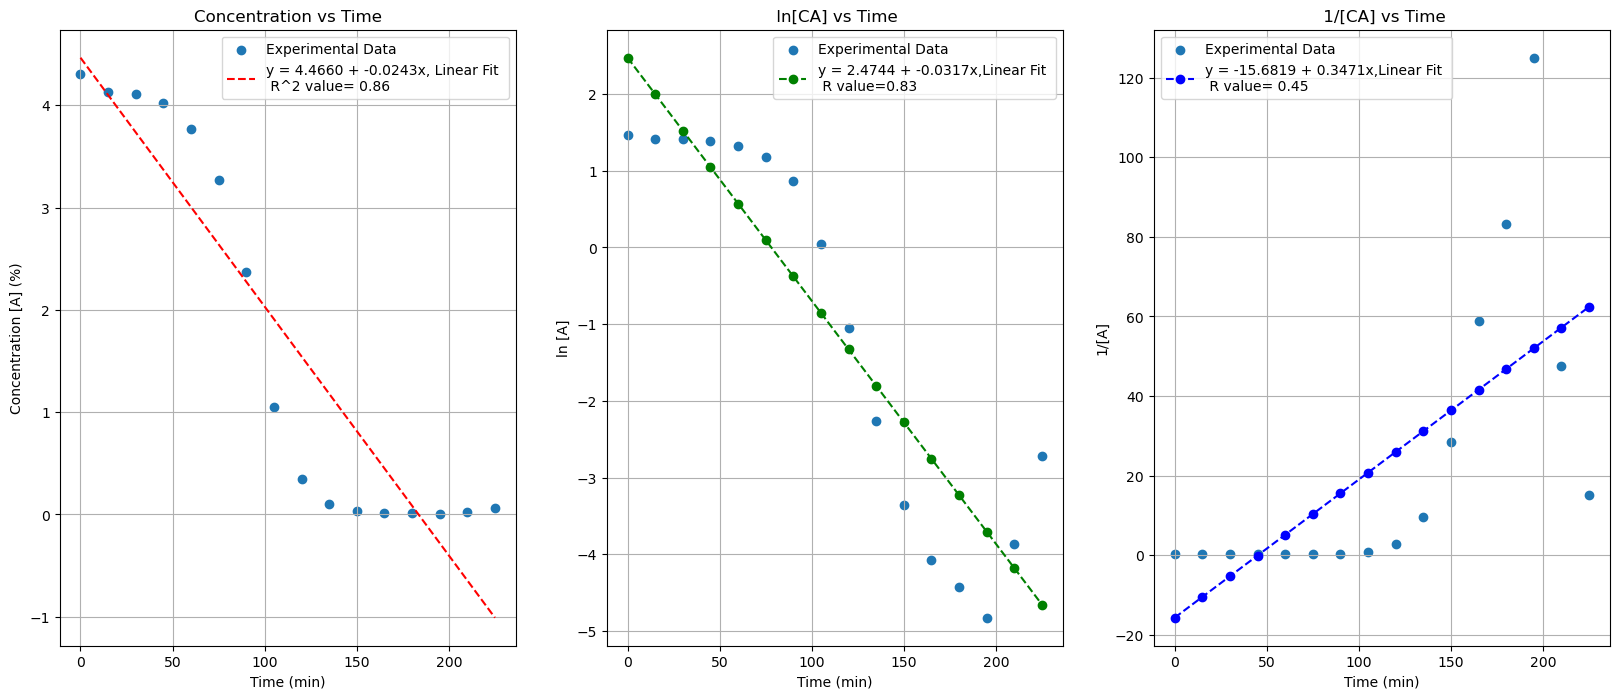

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score

# Load the CSV file
data = pd.read_csv('Activity_data.csv')
df2=pd.DataFrame(data)

x= df2.iloc[:,0].astype(float) # Time
y=df2.iloc[:,2].astype(float) # Concentration,[CA]

# data conversion for 1st order and 2nd order plot
y1=np.log(y) # ln[CA}
y2=1/y # 1/[CA]

# curve fitting by Linear regression method
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
y_pred= slope*x+intercept

R_2 = r2_score(y, y_pred)
print(f'The coefficient of determinant R^2 for zero order plot :{R_2:.4f}')

fig, axs = plt.subplots(1, 3, figsize=(20,8))

# zero order plot
axs[0].scatter(x,y, label='Experimental Data')
axs[0].plot(x, y_pred, 'r--', label=f'y = {intercept:.4f} + {slope:.4f}x, Linear Fit \n R^2 value= {R_2:.2f}')
axs[0].set_xlabel("Time (min)")
axs[0].set_ylabel("Concentration [A] (%)")
axs[0].set_title("Concentration vs Time")
axs[0].legend()
axs[0].grid()

# 1st order plot
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y1)
y_pred1= slope*x+intercept

R_2 = r2_score(y1, y_pred1)
print(f'The coefficient of determinant R^2 for 1st order plot :{R_2:.4f}')


axs[1].scatter(x,y1,label='Experimental Data')
axs[1].plot(x,y_pred1, 'go--',label=f'y = {intercept:.4f} + {slope:.4f}x,Linear Fit \n R value={R_2:.2f}' )
axs[1].set_xlabel("Time (min)")
axs[1].set_ylabel("ln [A]")
axs[1].set_title(" ln[CA] vs Time")
axs[1].legend()
axs[1].grid()

# 2nd order plot

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y2)
y_pred2= slope*x+intercept

R_2 = r2_score(y2,y_pred2)
print(f'The coefficient of determinant R^2 for 2nd order plot :{R_2:.4f}')

axs[2].scatter(x,y2,label='Experimental Data')
axs[2].plot(x,y_pred2, 'bo--',label=f'y = {intercept:.4f} + {slope:.4f}x,Linear Fit \n R value= {R_2:.2f}' )
axs[2].set_xlabel("Time (min)")
axs[2].set_ylabel("1/[A]")
axs[2].set_title(" 1/[CA] vs Time")
axs[2].legend()
axs[2].grid()

# Residual Plot

C:\Users\shams\AppData\Local\Temp\ipykernel_6160\2787229995.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
C:\Users\shams\AppData\Local\Temp\ipykernel_6160\2787229995.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()
C:\Users\shams\AppData\Local\Temp\ipykernel_6160\2787229995.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[2].legend()


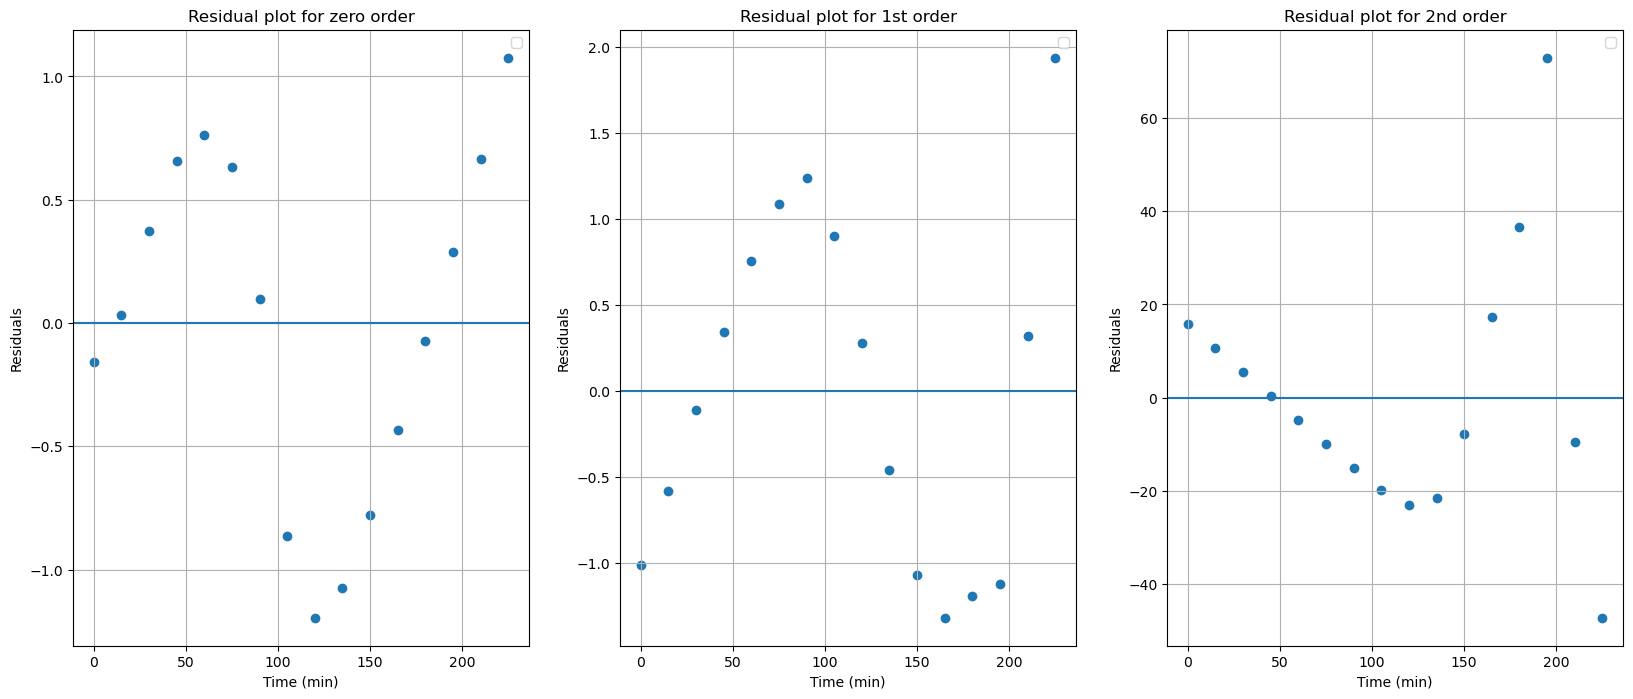

In [36]:
residuals_zero= y-y_pred
residuals_first= y1-y_pred1
residuals_2nd= y2-y_pred2

fig, axs = plt.subplots(1, 3, figsize=(20,8))

axs[0].scatter(x,residuals_zero)
axs[0].axhline(0)
axs[0].set_xlabel("Time (min)")
axs[0].set_ylabel("Residuals")
axs[0].set_title("Residual plot for zero order")
axs[0].legend()
axs[0].grid()

axs[1].scatter(x,residuals_first)
axs[1].axhline(0)
axs[1].set_xlabel("Time (min)")
axs[1].set_ylabel("Residuals")
axs[1].set_title("Residual plot for 1st order")
axs[1].legend()
axs[1].grid()

axs[2].scatter(x,residuals_2nd)
axs[2].axhline(0)
axs[2].set_xlabel("Time (min)")
axs[2].set_ylabel("Residuals")
axs[2].set_title("Residual plot for 2nd order")
axs[2].legend()
axs[2].grid()

In [37]:
# Curve Fit

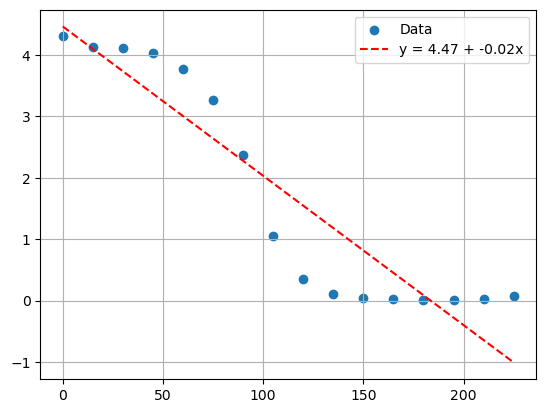

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the CSV file
data = pd.read_csv('Activity_data.csv')
df2=pd.DataFrame(data)
# print(df2)

x= df2.iloc[:,0].astype(float)
y=df2.iloc[:,2].astype(float)
def linear_model(x, a, b):
    return a + b * x
params, _ = curve_fit(linear_model, x, y)

plt.scatter(x, y, label='Data')
plt.plot(x, linear_model(x, *params), 'r--', label=f'y = {params[0]:.2f} + {params[1]:.2f}x')
plt.legend()
plt.grid()

# data for 1st order and 2nd order plot
y1=np.log(y)
y2=1/y


# Curve fitting by LinearRegression Mehod

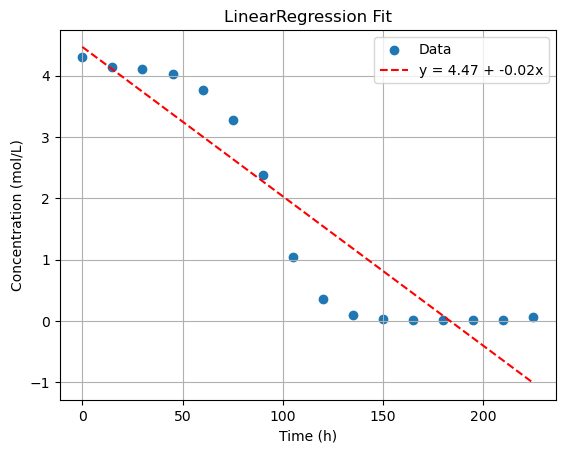

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the CSV file
data = pd.read_csv('Activity_data.csv')
df2=pd.DataFrame(data)
# print(df2)

x= df2.iloc[:,0].values
y=df2.iloc[:,2].values
x_reshaped = x.reshape(-1, 1)

model = LinearRegression().fit(x_reshaped, y)

# Plot
plt.scatter(x, y, label='Data')
plt.plot(x, model.predict(x_reshaped), 'r--', label=f'y = {model.intercept_:.2f} + {model.coef_[0]:.2f}x')
plt.xlabel('Time (h)')
plt.ylabel('Concentration (mol/L)')
plt.title('LinearRegression Fit')
plt.legend()
plt.grid(True)
plt.show()

# Experimental Results CO conversion VS temperature plot

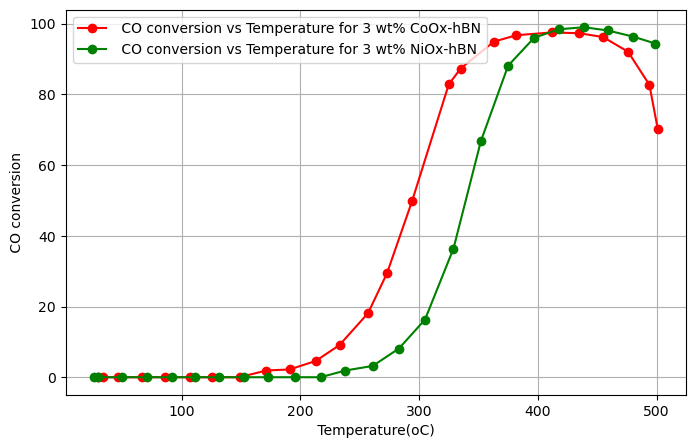

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

conversion_data= pd.read_csv("conversion.csv")
df= pd. DataFrame(conversion_data)

x1= df.iloc[:,0].astype(float)
y1=df.iloc[:,1].astype(float)
#print(x1)
#print(y1)

x2= df.iloc[:,2].astype(float)
y2=df.iloc[:,3].astype(float)
#print(x2)
#print(y2)

plt.figure(figsize=(8,5))
plt.plot(x1,y1, 'ro-',label=" CO conversion vs Temperature for 3 wt% CoOx-hBN" )
plt.plot(x2,y2, 'go-',label=" CO conversion vs Temperature for 3 wt% NiOx-hBN" )
plt.xlabel(" Temperature(oC) ")
plt.ylabel(" CO conversion ")
plt.grid()
plt.legend()
plt.show()